In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [2]:
# 데이터를 읽어온다.
df1 = pd.read_csv('./data/covtype.csv', header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
len(df1.columns)

55

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501285 entries, 0 to 501284
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       501285 non-null  int64
 1   1       501285 non-null  int64
 2   2       501285 non-null  int64
 3   3       501285 non-null  int64
 4   4       501285 non-null  int64
 5   5       501285 non-null  int64
 6   6       501285 non-null  int64
 7   7       501285 non-null  int64
 8   8       501285 non-null  int64
 9   9       501285 non-null  int64
 10  10      501285 non-null  int64
 11  11      501285 non-null  int64
 12  12      501285 non-null  int64
 13  13      501285 non-null  int64
 14  14      501285 non-null  int64
 15  15      501285 non-null  int64
 16  16      501285 non-null  int64
 17  17      501285 non-null  int64
 18  18      501285 non-null  int64
 19  19      501285 non-null  int64
 20  20      501285 non-null  int64
 21  21      501285 non-null  int64
 22  22      501285 non-n

In [5]:
df1.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
dtype: int64

In [6]:
# 입력과 결과로 나눈다.
X = df1.drop(54, axis=1)
y = df1[54]

In [7]:
y.unique(), len(y.value_counts())

(array([5, 2, 1, 7, 3, 6, 4], dtype=int64), 7)

In [8]:
y.values

array([5, 5, 2, ..., 1, 1, 1], dtype=int64)

In [9]:
encoder1 = LabelEncoder()
df1[54] = encoder1.fit_transform(y)
y = df1[54]

In [10]:
# 표준화
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
display(X)

array([[-1.28404903, -0.92314176, -1.43813607, ..., -0.16648171,
        -0.14438577, -0.11711887],
       [-1.305791  , -0.87869205, -1.57195572, ..., -0.16648171,
        -0.14438577, -0.11711887],
       [-0.53032733, -0.1408269 , -0.63521816, ..., -0.16648171,
        -0.14438577, -0.11711887],
       ...,
       [ 0.74882536,  1.18377439, -0.36757885, ..., -0.16648171,
        -0.14438577, -0.11711887],
       [ 0.74882536,  1.04153533, -1.17049676, ..., -0.16648171,
        -0.14438577, -0.11711887],
       [ 0.76694367,  0.94374597,  1.10443732, ..., -0.16648171,
        -0.14438577, -0.11711887]])

In [11]:
# 2진 분류 옵션들
# out_nodes = 1
# loss_function = 'binary_crossentropy'
# activation_function = 'sigmoid'

# 다중 분류 옵션들
out_nodes = len(y.value_counts())
loss_function = 'categorical_crossentropy'
activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
# if type(y) is pd.core.series.Series:
#     out_nodes = 1
# else : 
#     out_nodes = y.shape[1]
    
# loss_function = 'mean_squared_error'

In [12]:
# 원 핫 인코딩
# 결과데이터가 0, 1, 2라면...
# 0 => 1, 0, 0
# 1 => 0, 1, 0
# 2 => 0, 0, 1
# 로 환산하여 학습을 한다.
# 예측된 결과는 가장 값이 큰 자리의 순서 값으로 결정한다.
y = to_categorical(y)
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y[0].shape

(7,)

In [14]:
# 입력노드의 개수
# 입력 데이터 행 하나의 컬럼의 개수
input_size = X.shape[1]
input_size

54

In [15]:
# 신경망 설계
model = Sequential()

model.add(Dense(108, input_dim=input_size))
model.add(Activation('relu'))

model.add(Dense(54))
model.add(Activation('relu'))

model.add(Dense(27))
model.add(Activation('relu'))

model.add(Dense(out_nodes))
model.add(Activation(activation_function))

In [16]:
# 모델 컴파일
model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 108)               5940      
                                                                 
 activation (Activation)     (None, 108)               0         
                                                                 
 dense_1 (Dense)             (None, 54)                5886      
                                                                 
 activation_1 (Activation)   (None, 54)                0         
                                                                 
 dense_2 (Dense)             (None, 27)                1485      
                                                                 
 activation_2 (Activation)   (None, 27)                0         
                                                                 
 dense_3 (Dense)             (None, 7)                 1

In [17]:
# 학습모델을 저장할 경로
path = './model/covtype'

# 만약 폴더가 있다면 삭제한다.
if os.path.isdir(path):
    shutil.rmtree(path)

# 폴더를 생성한다.
os.makedirs(os.path.join(path))

In [18]:
path1 = path + '/{epoch}-{val_loss}.h5'
path2 = path + '/best_model.h5'

# 저장콜백
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', save_best_onlu=True)

In [19]:
# 조기 중단
call3 = EarlyStopping(monitor='val_loss', patience=100)

In [20]:
# 학습
# validation_split : 주어진 데이터에서 사용할 검증데이터 비율
history = model.fit(X, y, epochs=200000, batch_size=500, validation_split=0.2, callbacks=[call1, call2, call3])

Epoch 1/200000
803/803 [==============================] - 3s 3ms/step - loss: 0.6114 - accuracy: 0.7502 - val_loss: 0.8678 - val_accuracy: 0.6333
Epoch 2/200000
803/803 [==============================] - 2s 3ms/step - loss: 0.4815 - accuracy: 0.7950 - val_loss: 0.9296 - val_accuracy: 0.6275
Epoch 3/200000
803/803 [==============================] - 2s 3ms/step - loss: 0.4393 - accuracy: 0.8150 - val_loss: 0.9070 - val_accuracy: 0.6421
Epoch 4/200000
803/803 [==============================] - 3s 3ms/step - loss: 0.4089 - accuracy: 0.8299 - val_loss: 0.8524 - val_accuracy: 0.6623
Epoch 5/200000
803/803 [==============================] - 3s 3ms/step - loss: 0.3876 - accuracy: 0.8398 - val_loss: 0.9512 - val_accuracy: 0.6489
Epoch 6/200000
803/803 [==============================] - 3s 3ms/step - loss: 0.3716 - accuracy: 0.8473 - val_loss: 0.9889 - val_accuracy: 0.6323
Epoch 7/200000
803/803 [==============================] - 3s 3ms/step - loss: 0.3578 - accuracy: 0.8538 - val_loss: 1.2068 -

In [21]:
# 리스트를 추출한다.
loss_list = history.history['loss']
accuracy_list = history.history['accuracy']
val_loss_list = history.history['val_loss']
val_accuracy_list = history.history['val_accuracy']

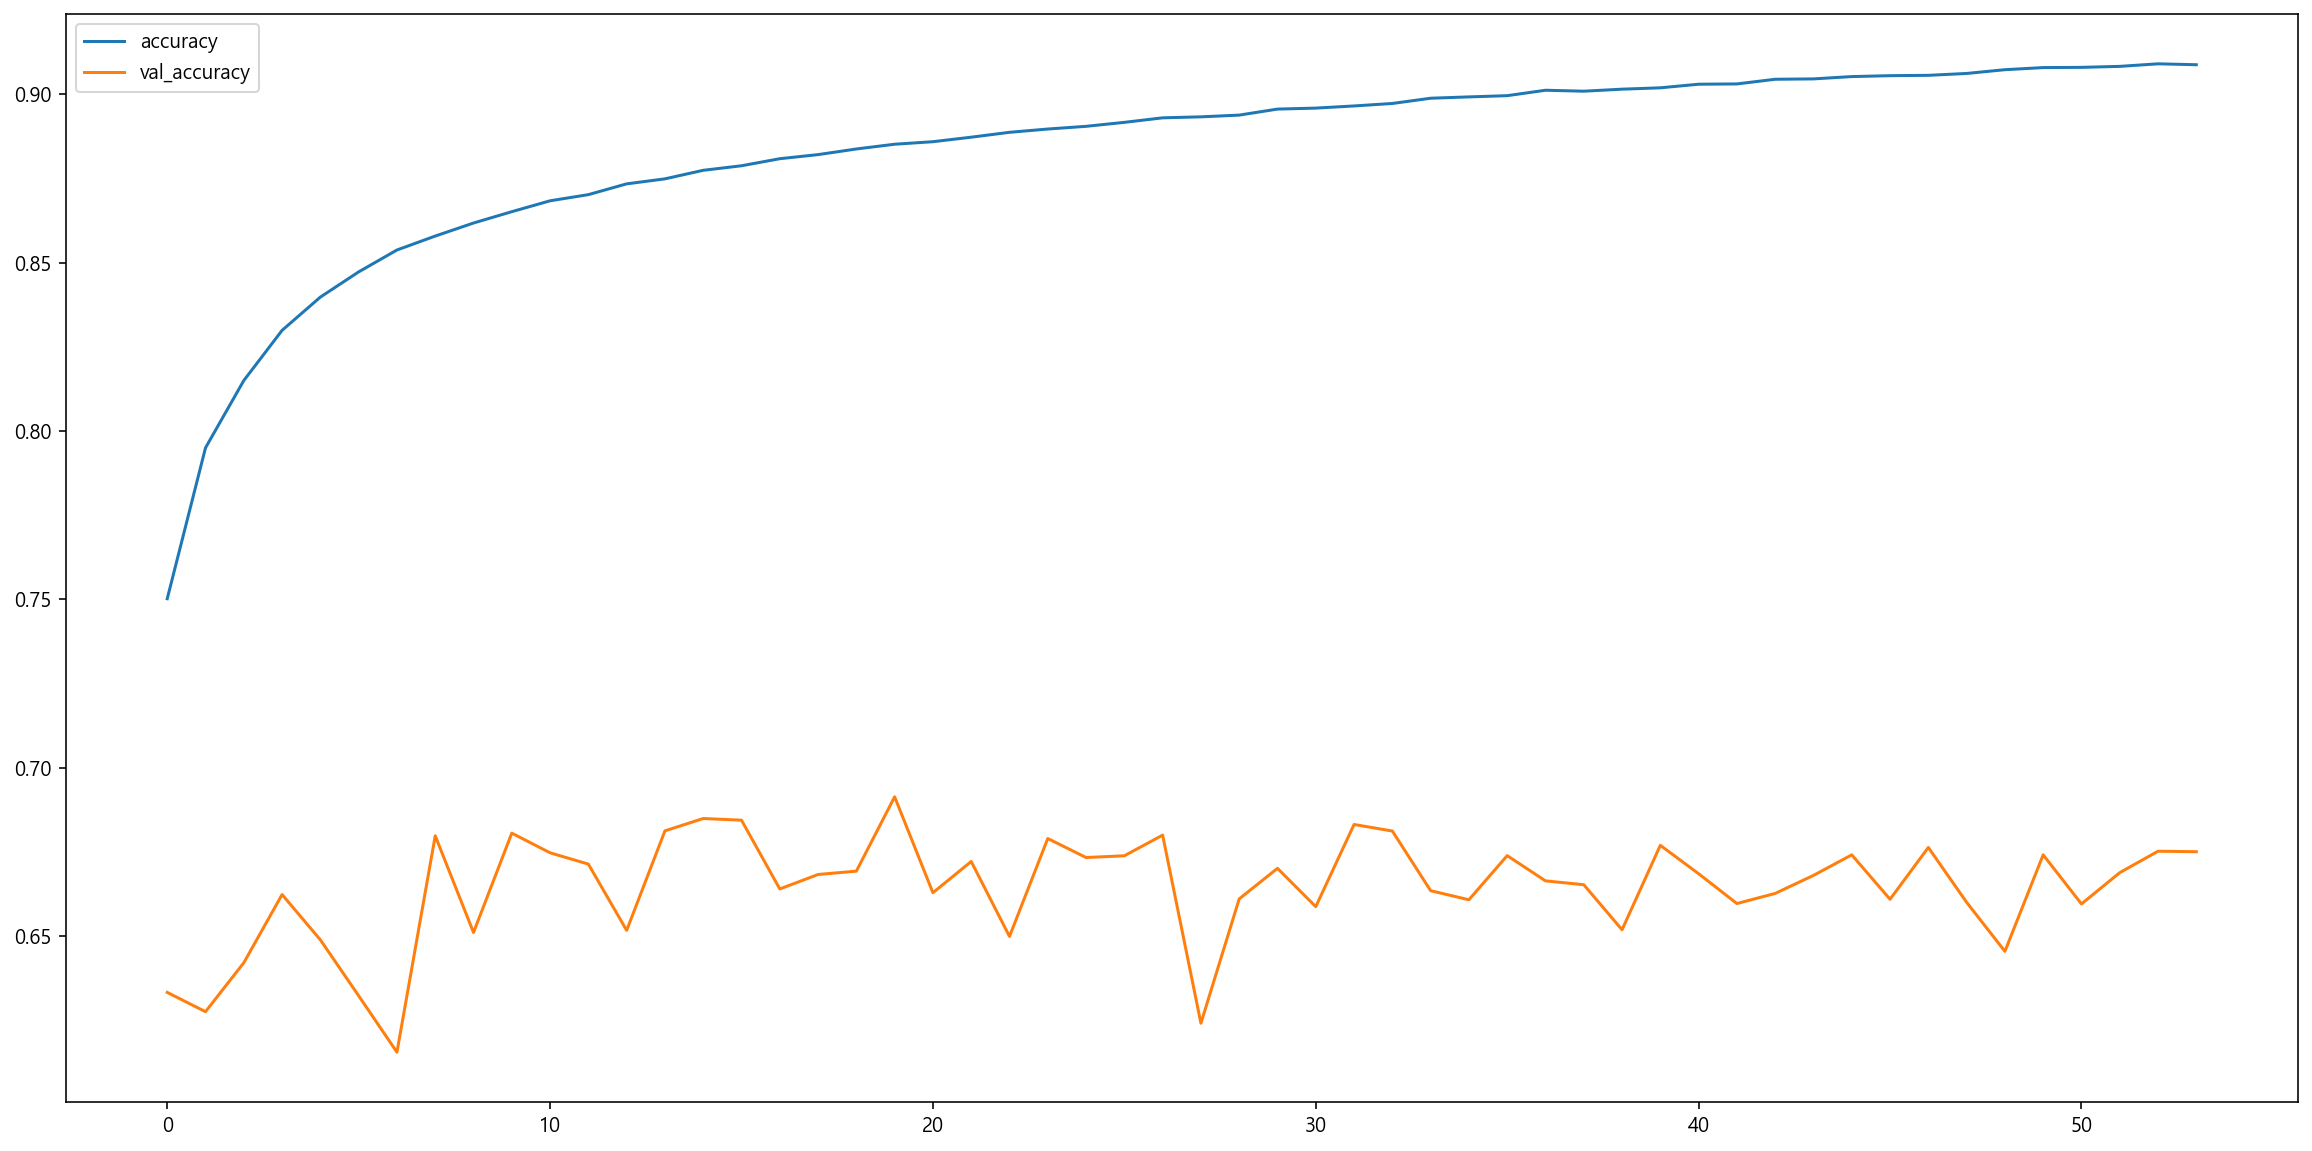

In [22]:
# 정확도 그래프
plt.figure(figsize=(20,10))
plt.plot(accuracy_list[:-50], label='accuracy')
plt.plot(val_accuracy_list[:-50], label = 'val_accuracy')
plt.legend()
plt.show()

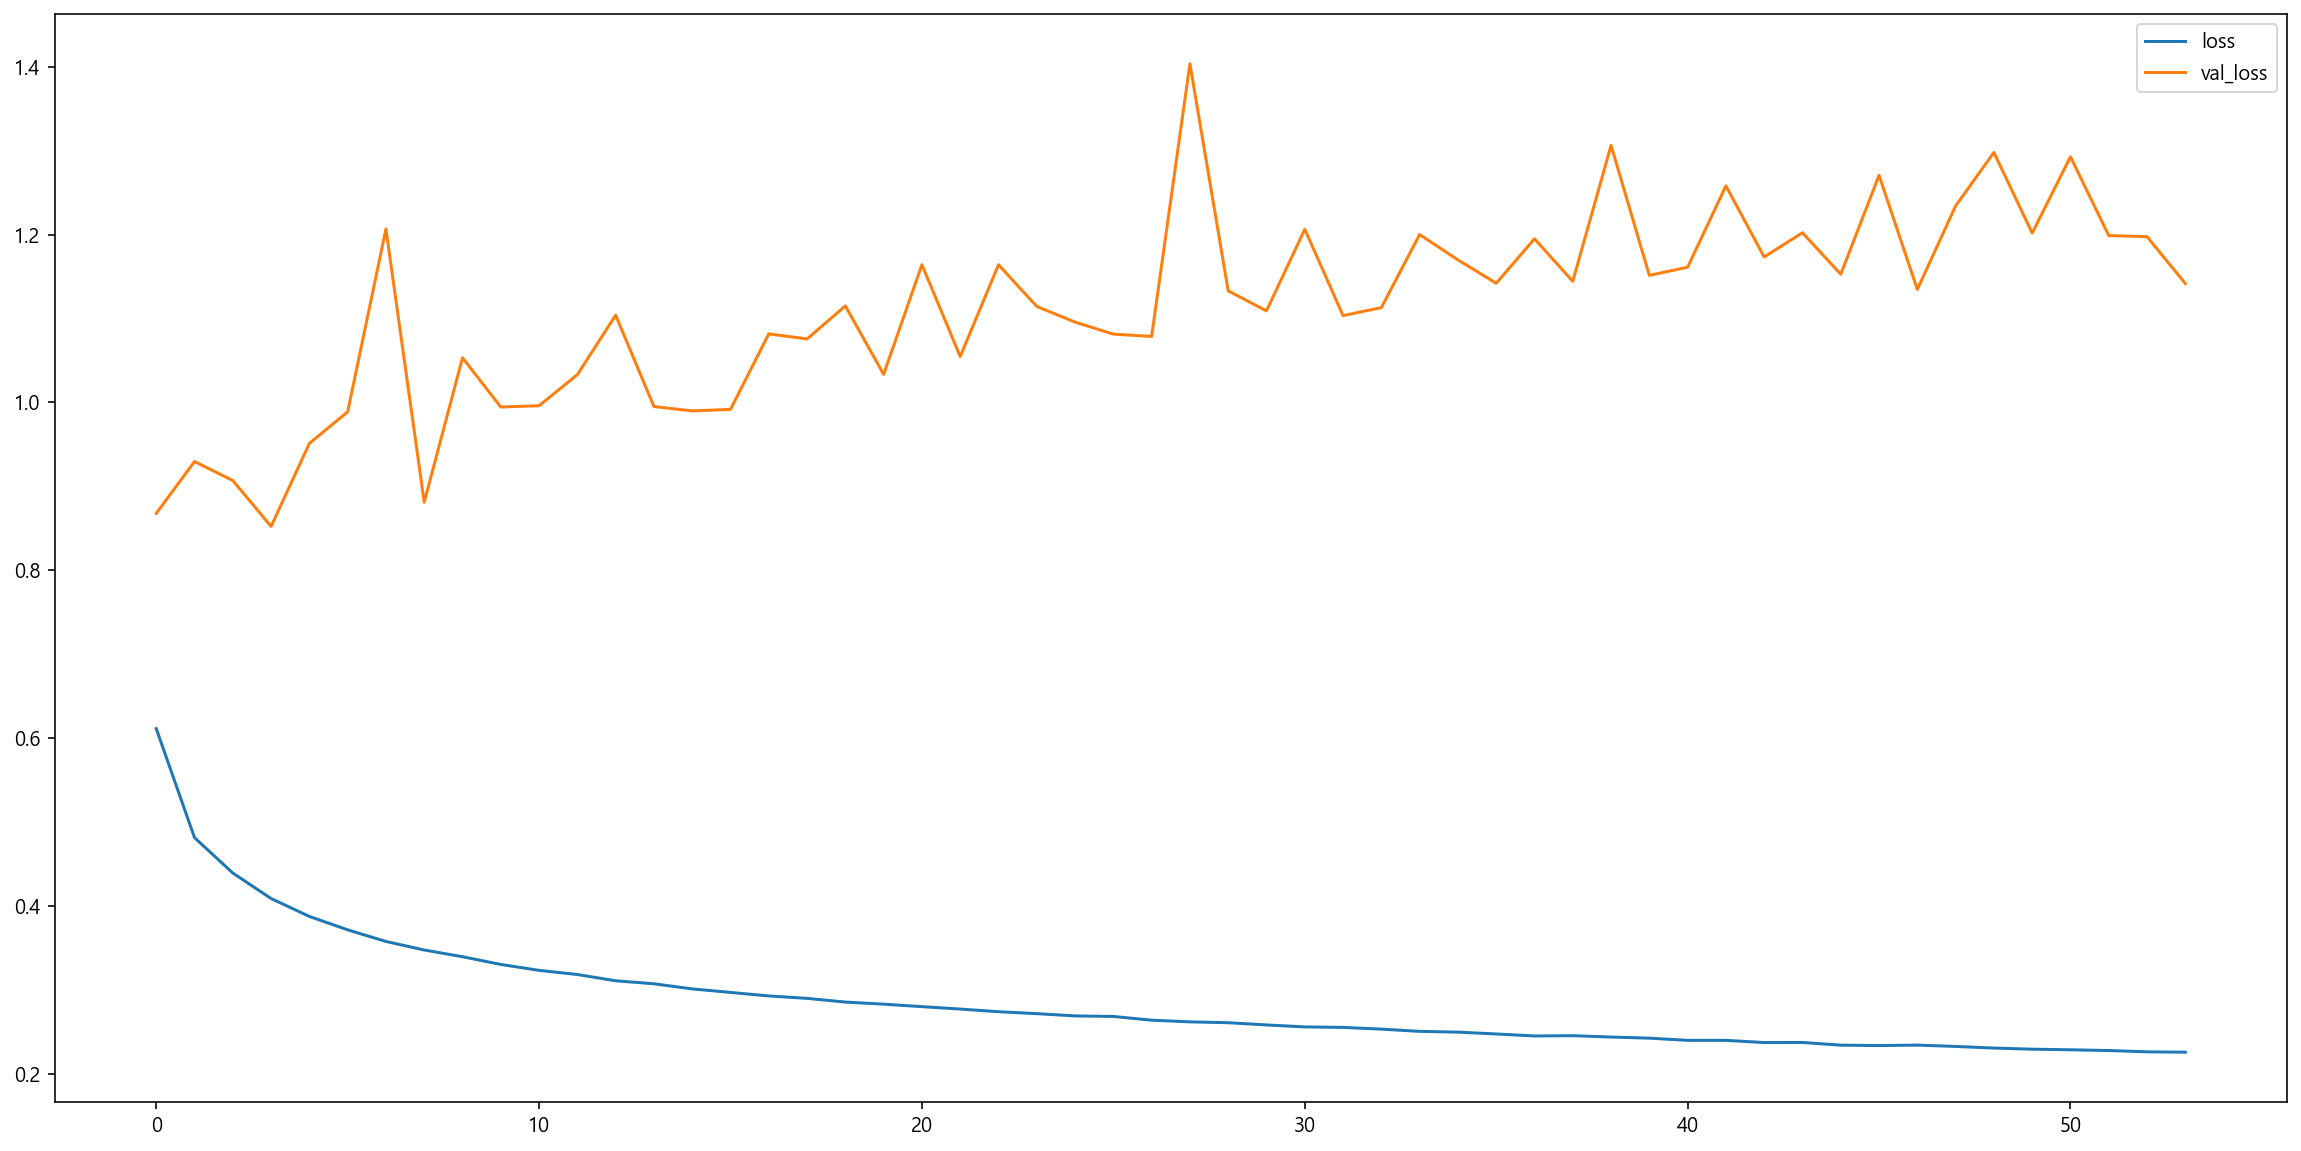

In [23]:
# 정확도 그래프
plt.figure(figsize=(20,10))
plt.plot(loss_list[:-50], label='loss')
plt.plot(val_loss_list[:-50], label = 'val_loss')
plt.legend()
plt.show()

In [24]:
# 모델을 가져온다.
best_model = load_model(path + '/best_model.h5')
best_model

In [25]:
a1 = best_model.evaluate(X, y)
print(f'손실률 : {a1[0]}')
print(f'정확도 : {a1[1]}')

15666/15666 [==============================] - 31s 2ms/step - loss: 0.3981 - accuracy: 0.8786
손실률 : 0.39809927344322205
정확도 : 0.8786478638648987


In [26]:
# 예측할 데이터를 가져온다.
df2 = pd.read_csv('./data/covtype_new.csv', header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,3182,261,32,800,261,3246,125,236,239,2532,...,0,0,0,0,0,0,0,0,0,0
1,3201,258,29,830,280,3267,138,241,233,2550,...,0,0,0,0,0,0,0,0,0,0
2,3216,256,26,859,295,3288,150,245,227,2568,...,0,0,0,0,0,0,0,0,0,0
3,3230,256,25,888,309,3310,152,245,226,2586,...,0,0,0,0,0,0,0,0,0,0
4,3243,255,25,918,322,3331,156,246,223,2605,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79727 entries, 0 to 79726
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       79727 non-null  int64
 1   1       79727 non-null  int64
 2   2       79727 non-null  int64
 3   3       79727 non-null  int64
 4   4       79727 non-null  int64
 5   5       79727 non-null  int64
 6   6       79727 non-null  int64
 7   7       79727 non-null  int64
 8   8       79727 non-null  int64
 9   9       79727 non-null  int64
 10  10      79727 non-null  int64
 11  11      79727 non-null  int64
 12  12      79727 non-null  int64
 13  13      79727 non-null  int64
 14  14      79727 non-null  int64
 15  15      79727 non-null  int64
 16  16      79727 non-null  int64
 17  17      79727 non-null  int64
 18  18      79727 non-null  int64
 19  19      79727 non-null  int64
 20  20      79727 non-null  int64
 21  21      79727 non-null  int64
 22  22      79727 non-null  int64
 23  23      797

In [28]:
df2.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
dtype: int64

In [30]:
# 표준화
X = scaler1.fit_transform(df2)
display(X)

array([[ 0.55716403,  0.92705456,  2.17699063, ..., -0.16261671,
        -0.21647887, -0.15904648],
       [ 0.62095178,  0.89930251,  1.75974016, ..., -0.16261671,
        -0.21647887, -0.15904648],
       [ 0.67131053,  0.88080115,  1.34248968, ..., -0.16261671,
        -0.21647887, -0.15904648],
       ...,
       [-2.11520696, -0.01651494,  0.09073825, ..., -0.16261671,
        -0.21647887, -0.15904648],
       [-2.12192146,  0.08524256, -0.18742873, ..., -0.16261671,
        -0.21647887, -0.15904648],
       [-2.12527871,  0.03898915, -0.46559571, ..., -0.16261671,
        -0.21647887, -0.15904648]])

In [38]:
# 예측한다.
pred = best_model.predict(X)
pred = (pred > 0.5).astype('int')
# pred = pred.reshape(-1)
pred

2492/2492 [==============================] - 2s 882us/step


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [40]:
np.argmax(pred, axis=1, out=None)

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [ ]:
y = to_categorical(y)
y

In [35]:
target = encoder1.inverse_transform(pred)
target

ValueError: y should be a 1d array, got an array of shape (79727, 7) instead.

In [33]:
df2[54] = target
df2.head()

ValueError: Length of values (558089) does not match length of index (79727)

In [69]:
# 저장한다.
df2.to_csv('./data/breast_canner_result.csv', index=False)